<a href="https://colab.research.google.com/github/meena-shankar/E-commerce-Review-Sentiment-Analysis/blob/main/Classification_task_with_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
path='/content/drive/My Drive/dataset/Clothing Reviews.csv'
df=pd.read_csv(path)


In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
df.drop(["Clothing ID", "Title"], axis=1, inplace=True)
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.isnull().sum()

Unnamed: 0                   0
Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [ ]:
len(df)

23486

In [ ]:
df.describe()

,Unnamed: 0,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,43.198544,4.196032,0.822362,2.535936
std,6779.968547,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
df['Age'].unique()

array([33, 34, 60, 50, 47, 49, 39, 24, 53, 44, 41, 32, 55, 31, 28, 46, 21,
       36, 65, 29, 38, 59, 40, 23, 67, 48, 43, 52, 56, 66, 61, 57, 58, 37,
       27, 62, 68, 51, 83, 69, 54, 63, 71, 30, 35, 64, 42, 22, 26, 72, 25,
       45, 74, 70, 20, 80, 93, 82, 77, 85, 73, 78, 79, 19, 76, 84, 75, 89,
       81, 90, 94, 86, 99, 18, 91, 87, 92])

In [ ]:
df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [ ]:
df['Recommended IND'].unique()

array([1, 0])

In [ ]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [ ]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Sentiment Analysis

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df.dtypes

Unnamed: 0                  int64
Age                         int64
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [ ]:
df['Review Text'].head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: Review Text, dtype: object

In [ ]:
df['Review Text'].dtypes

dtype('O')

Removing the rows that has null values

In [ ]:
df = df[~df['Review Text'].isnull()]

In [ ]:
df['length']=df['Review Text'].apply(len)

In [ ]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


Length after removing the rows where Review Text is null

In [ ]:
len(df)

22641

Text(0.5, 1.0, 'message length')

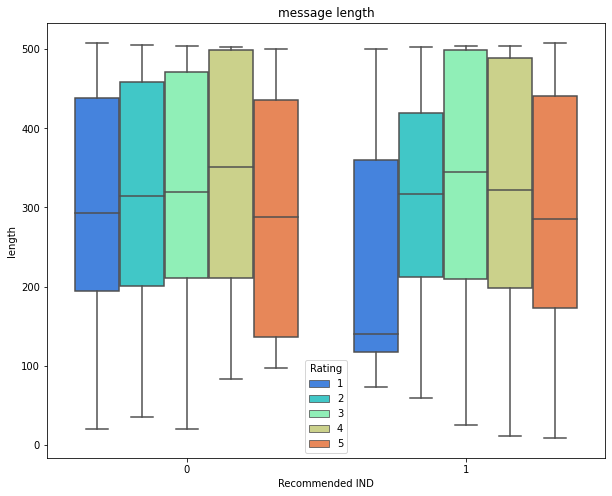

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Recommended IND',y='length',data=df,hue='Rating',palette='rainbow')
plt.title('message length')

In [ ]:
df.length.describe()


count    22641.000000
mean       308.687911
std        143.940048
min          9.000000
25%        186.000000
50%        301.000000
75%        459.000000
max        508.000000
Name: length, dtype: float64

maximum length is 508.

In [ ]:
df[df['length'] == 508]['Review Text'].iloc[0]


'I adore this blouse. the colors are vibrant (see my photo below). this is one of my favorite purchases from retailer. the top is light weight. true to size. i ordered a petite small and am 5 feet tall 120 lbs. and curvy. i left it untucked and loose like in the photo and it was very flattering. i disagree about it being frumpy. i wore it with kelly green retailer brand slacks paired with the retailer yellow sweater coat with white piping, and the retailer moss suede cross bag and neutral color (nude) fl'

**Removing puntuations**

In [ ]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['Review Text']=df['Review Text'].apply(lambda x: remove_punctuation(x))
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


**Text blob for polarity**

In [ ]:
from textblob import TextBlob
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


In [ ]:
df["Polarity"] = df["Review Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750


In [ ]:
df['Polarity'].min()

-0.9750000000000001

In [ ]:
def getAnalysis(polarity):
  if polarity < 0:
    return 'Negative'
  elif polarity == 0:
    return 'Neutral'
  else:
    return 'Positive'
   

In [ ]:
 df['TextBlob_Analysis']=df['Polarity'].apply(getAnalysis)


In [ ]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity,TextBlob_Analysis
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333,Positive
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750,Positive
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392,Positive
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000,Positive
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750,Positive


In [ ]:
polarity_plot=df['TextBlob_Analysis'].value_counts()

In [ ]:
polarity_plot

Positive    21213
Negative     1333
Neutral        95
Name: TextBlob_Analysis, dtype: int64

In [ ]:
positive= 21213/len(df)*100
negative= 1333/len(df)*100
neutral= 95/len(df)*100

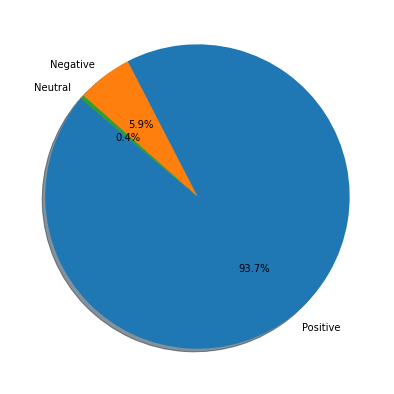

In [ ]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]
plt.figure(figsize=(12,7))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=140)
plt.show()

***Label Encoding***

In [ ]:
 #Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Encoded_value']= label_encoder.fit_transform(df['TextBlob_Analysis'])
  
df['Encoded_value'].unique()

array([2, 0, 1])

In [ ]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity,TextBlob_Analysis,Encoded_value
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333,Positive,2
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750,Positive,2
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392,Positive,2
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000,Positive,2
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750,Positive,2


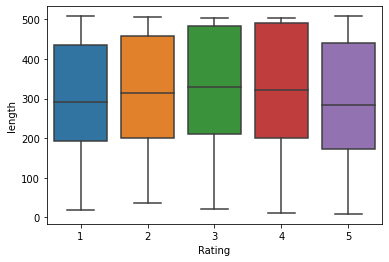

In [ ]:
sns.boxplot(x="Rating", y="length", data=df,)

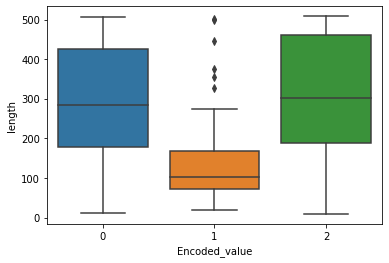

In [ ]:
sns.boxplot(x="Encoded_value", y="length", data=df,)

# ***NLP Classification Task***

# Bag Of Words

In [ ]:
df['TextBlob_Analysis']=df['TextBlob_Analysis'].astype(str)

In [ ]:
df['Polarity'].dtypes

dtype('float64')

In [ ]:
df['Polarity'] = df['Polarity'].astype(str)

In [ ]:
df['Review Text'] = df['Review Text'].astype(str)

**Cleaning the texts in 'Review Text' column and creating a corpus.**

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from tqdm import tqdm
df.index = np.arange(len(df))
corpus = []
for i in range(len(df)):
  review = re.sub('[^a-zA-Z]', ' ', df['Review Text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#vectorization


**In order to fit the corpus in count vectorizer, we need to change into the corpus to array**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [ ]:
print(y)

[2 2 2 ... 2 2 2]


**Splitting the dataset into the Training set and Test set**


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

**Training a Model**

**Using Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Fitting the train and text data in the Multinomial MB**

In [ ]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Predictions and Evaluations**

In [ ]:
predictions = nb.predict(X_test)

**Create a confusion matrix and classification report using these predictions and y_test**



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
acc = accuracy_score(y_test,predictions)

In [ ]:
print("Accuracy of the classifier: ",acc)
print("Confusion matrix is :\n",metrics.confusion_matrix(y_test,predictions))
print("Classification report: \n" ,metrics.classification_report(y_test,predictions))

Accuracy of the classifier:  0.9291234268050342
Confusion matrix is :
 [[  27    0  267]
 [   0    0   21]
 [  33    0 4181]]
Classification report: 
               precision    recall  f1-score   support

           0       0.45      0.09      0.15       294
           1       0.00      0.00      0.00        21
           2       0.94      0.99      0.96      4214

    accuracy                           0.93      4529
   macro avg       0.46      0.36      0.37      4529
weighted avg       0.90      0.93      0.91      4529



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**The accuracy with Multinomial NB is 0.93**

#**Using Text Processing**

***Tfidf term frequency inverse document frequency***

TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

#**Using the Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
X = df['Review Text']
y = df['Encoded_value']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

**Predictions and Evaluation**

In [ ]:
predictions = pipeline.predict(X_test)

In [ ]:
print("Confusion matrix is :\n",metrics.confusion_matrix(y_test,predictions))
print("Classification report: \n" ,metrics.classification_report(y_test,predictions))

Confusion matrix is :
 [[   0    0  389]
 [   0    0   29]
 [   0    0 6375]]
Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       389
           1       0.00      0.00      0.00        29
           2       0.94      1.00      0.97      6375

    accuracy                           0.94      6793
   macro avg       0.31      0.33      0.32      6793
weighted avg       0.88      0.94      0.91      6793



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**The accuracy using pipeline method is 0.94**